In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import json
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast

In [ ]:
df = pd.read_csv("/kaggle/input/tmdb-15000-movies-dataset-with-credits/movie_data.csv",
                lineterminator="\n")

In [ ]:
df.head()

In [ ]:
df.isna().sum()

In [ ]:
df['overview'].fillna("No Overview", inplace=True)

## Function to parse JSON value and extract names for certain groups

In [ ]:
def parse_json(x):
    l = []
    
    for i in ast.literal_eval(x):
        l += [i['name']]
        
    return ", ".join(l)

In [ ]:
df['parsed_genres'] = df['genres'].apply(parse_json)
df['parsed_cast'] = df['cast'].apply(parse_json)
df['parsed_crew'] = df['crew'].apply(parse_json)

## Summarising whole text infromation about the each movie

In [ ]:
df['information'] = df['overview'] + ". " + df['parsed_genres'] + ". " + df['parsed_cast'] + ". " + df['parsed_crew']

In [ ]:
ps = PorterStemmer()

In [ ]:
def stem(x):
    ls = []
    for i in x.split():
        ls.append(ps.stem(i))
        
    return " ".join(ls)

In [ ]:
df['information'] = df['information'].apply(stem)

In [ ]:
df['information'] = df['information'].apply(lambda x: x.lower())

In [ ]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(df['information']).toarray()

## Applying cosine similarity to vectorized description

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis or, as in our case, for recommendation systems

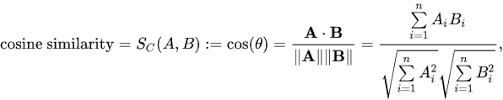

In [ ]:
similarity = cosine_similarity(vectors)

In [ ]:
def recommend(movie):
    indices = df[df['title'] == movie].index[0]
    distances = similarity[indices]
    arr = sorted(list(enumerate(distances)), reverse = True, key=lambda x: x[1])[1:8]
    
    for i in arr:
        print(df.loc[i[0], 'title'])

In [ ]:
recommend('3 Idiots')